# Written by Yixuan Tang
# for NYU CUSP PUI
### Assignment 2 Homework 3

In [2]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")
    
os.getenv("PUIDATA")

Populating the interactive namespace from numpy and matplotlib


'/home/cusp/yt1369/PUIdata'

# IDEA:
## The post-90s are more likely than pre-90s to choose biking _for commuting_

# NULL HYPOTHESIS:
## The ratio of post-90s biking on weekends over post-90s biking on weekdays is _the same_ or _lower_  than the ratio of pre-90s biking over weekends to pre-90s biking on weekdays

# _$H_0$_ : $\frac{Pr_{\mathrm{weekend}}}{Pr_{\mathrm{week}}} <= \frac{Po_{\mathrm{weekend}}}{Po_{\mathrm{week}}}$
# _$H_1$_ : $\frac{Pr_{\mathrm{weekend}}}{Pr_{\mathrm{week}}} > \frac{Po_{\mathrm{weekend}}}{Po_{\mathrm{week}}}$


## I choose the significance level  $\alpha=0.05$

#### which means I want the probability of getting a result at least as significant as mine to be less then 5%

## Starting with a single month of data:  reading data from citibike csv file from Jul 2017


### download and move  data to PUIDATA
# NOTE: 
# 1. access to data from within the notebook _is required_
# 2. if data is downloaded it _must_ be stored in a directory pointed to by the environmental variable PUIDATA

In [3]:
### Fist, download the data

def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [4]:
datestring = 'JC-201707'
getCitiBikeCSV(datestring)

file in place, you can continue


In [5]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
df.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,340,2017-07-01 00:00:08,2017-07-01 00:05:48,3186,Grove St PATH,40.719586,-74.043117,3267,Morris Canal,40.712419,-74.038526,29643,Subscriber,1994.0,2,2017-07-01 00:00:08
1,439,2017-07-01 00:02:35,2017-07-01 00:09:55,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,29585,Subscriber,1980.0,1,2017-07-01 00:02:35
2,186,2017-07-01 00:04:33,2017-07-01 00:07:40,3186,Grove St PATH,40.719586,-74.043117,3270,Jersey & 6th St,40.725289,-74.045572,29219,Subscriber,1984.0,1,2017-07-01 00:04:33


In [6]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

In [7]:
df.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'gender'], axis=1, inplace=True)

In [8]:
df.rename(columns = lambda x:x.replace("birth year","birthyear"), inplace = True)

In [18]:
df.head(3)

,birthyear,date
0,1994.0,2017-07-01 00:00:08
1,1980.0,2017-07-01 00:02:35
2,1984.0,2017-07-01 00:04:33


### Lets separate post-90s (_po) from pre-90s (_pr) to test the hypotheses.
### In this csv file we have the birth year

### Lets plot the number of trips per week day

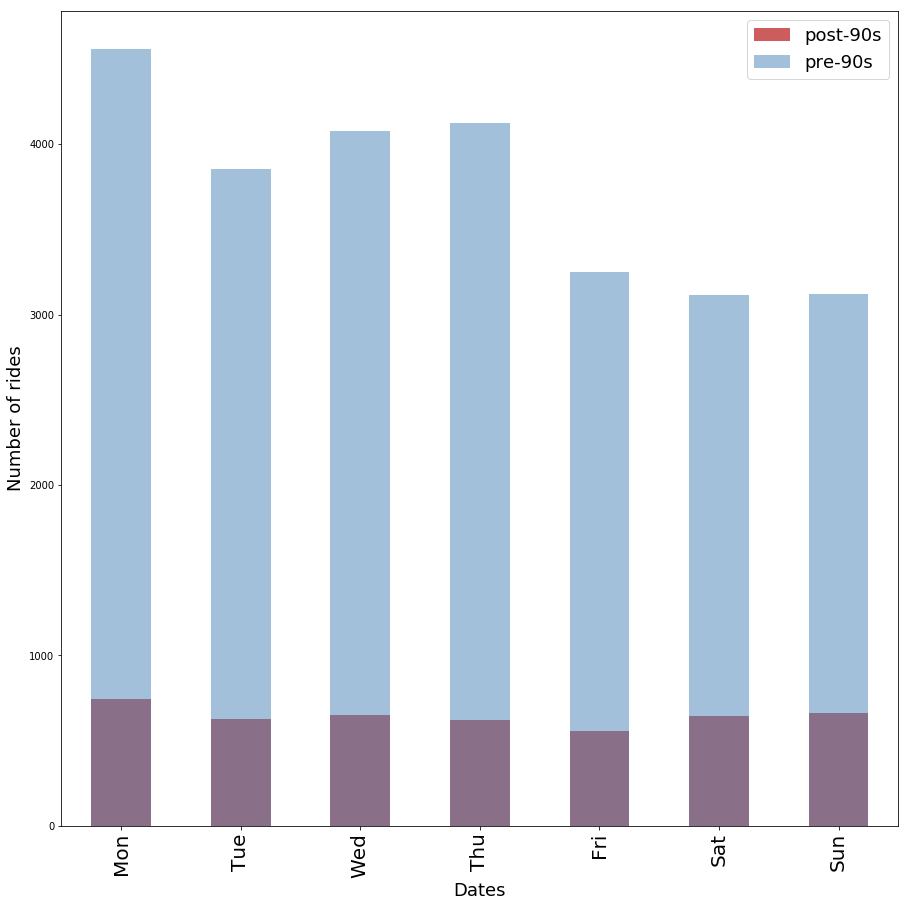

In [14]:
fig = pl.figure(figsize(15,15))

#instad of plotting with matplotlib i.e. plot() i use the plot method in pandas
norm_po = 1
((df['date'][df['birthyear'] >= 1990].groupby([df['date'].dt.weekday]).count()) / norm_po).plot(kind="bar", 
                                                                                         color='IndianRed', 
                                                                                         label='post-90s')

norm_pr = 1
ax = ((df['date'][df['birthyear'] < 1990].groupby([df['date'].dt.weekday]).count()) / norm_pr).plot(kind="bar", 
                                                                                              color='SteelBlue', 
                                                                                              alpha=0.5,
                                                                                              label='pre-90s')

tmp = ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
pl.ylabel("Number of rides", fontsize = 18)
pl.xlabel("Dates", fontsize = 18)
pl.legend(fontsize = 18)

## Figure 1a: Distribution of Citibike bikers by generations in July 2017, absolute counts

### Note: the counts have errors of course. what is the error on the count statistics? 
### for N counts the error is sqrt(N) - this is because counts follow a Poisson statistic

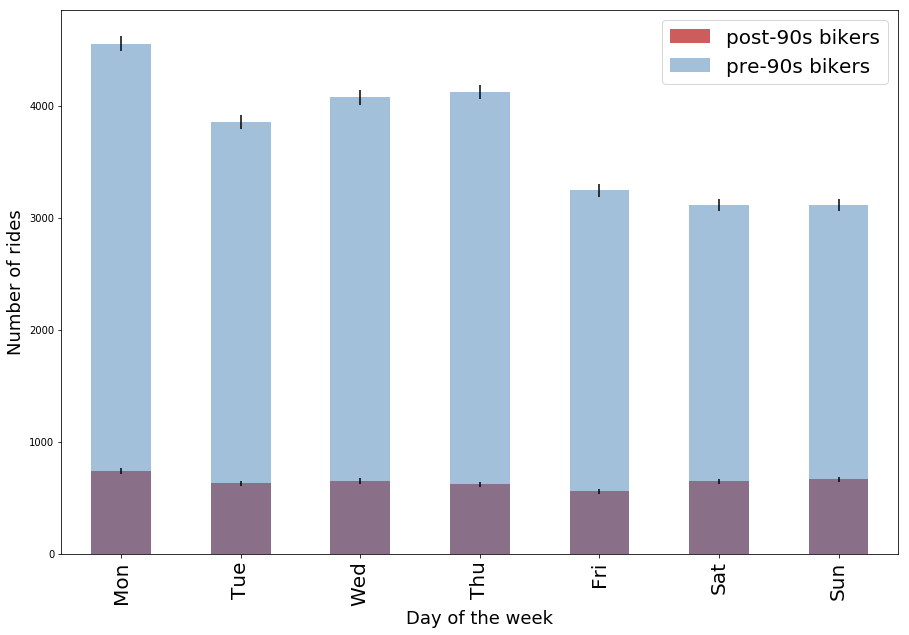

In [17]:
fig=pl.figure(figsize(15,10))

counts_po = df.date[df.birthyear >=1990].groupby([df.date.dt.weekday]).count()
norm_po=1
error_po = np.sqrt(counts_po)
ax = ((counts_po) / norm_po).plot(kind="bar",color='IndianRed',  yerr=[((error_po) / norm_po, (error_po) / norm_po)], label='post-90s bikers')


counts_pr = df.date[df.birthyear <1990].groupby([df.date.dt.weekday]).count()
norm_pr = 1
error_pr=np.sqrt(counts_pr)
((counts_pr) / norm_pr).plot(kind="bar", alpha=0.5, yerr=[((error_pr) / norm_pr, (error_pr) / norm_pr)], 
                           color='SteelBlue', label='pre-90s bikers')
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)
ax.set_ylabel ("Number of rides", fontsize = 18)
ax.set_xlabel ("Day of the week", fontsize = 18)
pl.legend(['post-90s bikers','pre-90s bikers'],fontsize=20)


## Figure 1b: Distribution of Citibike bikers by age in July 2017, absolute counts, with statistical errors

Note: These are absolute numbers. It is very hard to compare absolute numbers. Ratios (or proportions) are more ameable to comparison, so let's _normalize_ the distribution of man, and that of women, i.e. devide them by the total number of rides for that gender. 
(Notice that i have to normalize the errorbars too!)



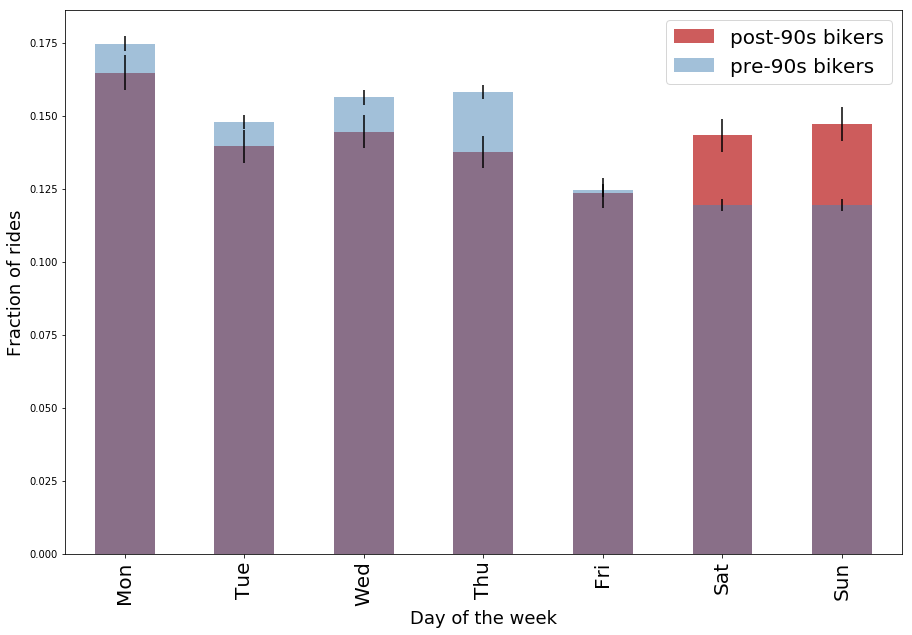

In [12]:
fig = pl.figure(figsize(15,10))

norm_po = counts_po.sum()
error_po = np.sqrt(counts_po)
((counts_po) / norm_po).plot(kind="bar", color='IndianRed',  
                           yerr=[((error_po) / norm_po, (error_po) / norm_po)], 
                           label='post-90s bikers')

norm_pr = counts_pr.sum()
ax = ((counts_pr) / norm_pr).plot(kind="bar", alpha=0.5, 
                                yerr=[((error_pr) / norm_pr, (error_pr) / norm_pr)], 
                                color='SteelBlue', label='pre-90s bikers')

ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
ax.set_ylabel ("Fraction of rides", fontsize=18)
ax.set_xlabel ("Day of the week", fontsize=18)

pl.legend(['post-90s bikers','pre-90s bikers'],fontsize=20)


## Figure 2: Distribution of Citibike bikers by in July 2017, normalized